In [1]:
import pandas as pd
from datetime import datetime
from calendar import monthrange
import seaborn as sns

In [2]:
missing_values = ["-"]
df = pd.read_csv("History of Ice on Lake Mendota.csv", na_values=missing_values)
df.head()

,START YEAR,END YEAR,CLOSED,OPENED,DAYS
0,1855,1856,18 Dec,14 Apr,118.0
1,1856,1857,6 Dec,6 May,151.0
2,1857,1858,25 Nov,26 Mar,121.0
3,1858,1859,8 Dec,14 Mar,96.0
4,1859,1860,7 Dec,26 Mar,110.0


In [3]:
df.isnull().sum()

START YEAR    0
END YEAR      0
CLOSED        0
OPENED        0
DAYS          6
dtype: int64

In [4]:
df['DAYS'].fillna(0, inplace=True)
df

,START YEAR,END YEAR,CLOSED,OPENED,DAYS
0,1855,1856,18 Dec,14 Apr,118.0
1,1856,1857,6 Dec,6 May,151.0
2,1857,1858,25 Nov,26 Mar,121.0
3,1858,1859,8 Dec,14 Mar,96.0
4,1859,1860,7 Dec,26 Mar,110.0
5,1860,1861,14 Dec,10 Apr,117.0
6,1861,1862,2 Dec,13 Apr,132.0
7,1862,1863,26 Dec,9 Apr,104.0
8,1863,1864,18 Dec,21 Apr,125.0
9,1864,1865,8 Dec,5 Apr,118.0


In [5]:
def transformYear(row):
    closedMonth = datetime.strptime(row['CLOSED'], '%d %b').month
    openedMonth = datetime.strptime(row['OPENED'], '%d %b').month
    if closedMonth in [11, 12] and openedMonth in [11, 12]:
        row['FULL_CLOSED'] = str(row['START YEAR']) + ' ' + row['CLOSED']
        row['FULL_OPENED'] = str(row['START YEAR']) + ' ' + row['OPENED']
    elif closedMonth not in [11, 12]:
        row['FULL_CLOSED'] = str(row['END YEAR']) + ' ' + row['CLOSED']
        row['FULL_OPENED'] = str(row['END YEAR']) + ' ' + row['OPENED']
    else:
        row['FULL_CLOSED'] = str(row['START YEAR']) + ' ' + row['CLOSED']
        row['FULL_OPENED'] = str(row['END YEAR']) + ' ' + row['OPENED']
    
    row['FULL_CLOSED'] = datetime.strptime(row['FULL_CLOSED'], '%Y %d %b').date()
    row['FULL_OPENED'] = datetime.strptime(row['FULL_OPENED'], '%Y %d %b').date()
    return row

In [6]:
df = df.apply(lambda x: transformYear(x), axis=1)
df

,START YEAR,END YEAR,CLOSED,OPENED,DAYS,FULL_CLOSED,FULL_OPENED
0,1855,1856,18 Dec,14 Apr,118.0,1855-12-18,1856-04-14
1,1856,1857,6 Dec,6 May,151.0,1856-12-06,1857-05-06
2,1857,1858,25 Nov,26 Mar,121.0,1857-11-25,1858-03-26
3,1858,1859,8 Dec,14 Mar,96.0,1858-12-08,1859-03-14
4,1859,1860,7 Dec,26 Mar,110.0,1859-12-07,1860-03-26
5,1860,1861,14 Dec,10 Apr,117.0,1860-12-14,1861-04-10
6,1861,1862,2 Dec,13 Apr,132.0,1861-12-02,1862-04-13
7,1862,1863,26 Dec,9 Apr,104.0,1862-12-26,1863-04-09
8,1863,1864,18 Dec,21 Apr,125.0,1863-12-18,1864-04-21
9,1864,1865,8 Dec,5 Apr,118.0,1864-12-08,1865-04-05


In [7]:
from collections import OrderedDict
months = OrderedDict([(11,'NOV'), (12,'DEC'), (1,'JAN'), (2,'FEB'), (3,'MAR'), (4,'APR'), (5,'MAY')])
months

OrderedDict([(11, 'NOV'),
             (12, 'DEC'),
             (1, 'JAN'),
             (2, 'FEB'),
             (3, 'MAR'),
             (4, 'APR'),
             (5, 'MAY')])

In [8]:
def getDaysPerMonth(test_df, average=False):
    START = False
    full_closed = test_df['FULL_CLOSED']
    full_opened = test_df['FULL_OPENED']
    if (full_closed.year == full_opened.year) and (full_closed.month == full_opened.month):
        for month in months:
            if month == full_closed.month:
                test_df[months[month]] = (full_opened.day - full_closed.day + 1)/monthrange(full_closed.year, month)[1]
            else:
                test_df[months[month]] = 0
    else:
        for month in months:
            year = full_closed.year if month in [11, 12] else full_opened.year
            if month == full_closed.month:
                START = True
                daysPerMonth = monthrange(full_closed.year, month)[1] - full_closed.day + 1
            elif month == full_opened.month:
                START = False
                daysPerMonth = full_opened.day
            else:
                if(START):
                    daysPerMonth = monthrange(year, month)[1]
                else:
                    daysPerMonth = 0
            
            test_df[months[month]] = daysPerMonth if not average else daysPerMonth/monthrange(year, month)[1]
    return test_df

In [9]:
df = df.apply(lambda x: getDaysPerMonth(x, average=True), axis=1)
df

,START YEAR,END YEAR,CLOSED,OPENED,DAYS,FULL_CLOSED,FULL_OPENED,NOV,DEC,JAN,FEB,MAR,APR,MAY
0,1855,1856,18 Dec,14 Apr,118.0,1855-12-18,1856-04-14,0.000000,0.451613,1.000000,1.000000,1.000000,0.466667,0.000000
1,1856,1857,6 Dec,6 May,151.0,1856-12-06,1857-05-06,0.000000,0.838710,1.000000,1.000000,1.000000,1.000000,0.193548
2,1857,1858,25 Nov,26 Mar,121.0,1857-11-25,1858-03-26,0.200000,1.000000,1.000000,1.000000,0.838710,0.000000,0.000000
3,1858,1859,8 Dec,14 Mar,96.0,1858-12-08,1859-03-14,0.000000,0.774194,1.000000,1.000000,0.451613,0.000000,0.000000
4,1859,1860,7 Dec,26 Mar,110.0,1859-12-07,1860-03-26,0.000000,0.806452,1.000000,1.000000,0.838710,0.000000,0.000000
5,1860,1861,14 Dec,10 Apr,117.0,1860-12-14,1861-04-10,0.000000,0.580645,1.000000,1.000000,1.000000,0.333333,0.000000
6,1861,1862,2 Dec,13 Apr,132.0,1861-12-02,1862-04-13,0.000000,0.967742,1.000000,1.000000,1.000000,0.433333,0.000000
7,1862,1863,26 Dec,9 Apr,104.0,1862-12-26,1863-04-09,0.000000,0.193548,1.000000,1.000000,1.000000,0.300000,0.000000
8,1863,1864,18 Dec,21 Apr,125.0,1863-12-18,1864-04-21,0.000000,0.451613,1.000000,1.000000,1.000000,0.700000,0.000000
9,1864,1865,8 Dec,5 Apr,118.0,1864-12-08,1865-04-05,0.000000,0.774194,1.000000,1.000000,1.000000,0.166667,0.000000


In [10]:
freeze_df = df.filter(['START YEAR', 'NOV', 'DEC', 'JAN', 'FEB', 'MAR', 'APR', 'MAY'], axis=1)
freeze_df

,START YEAR,NOV,DEC,JAN,FEB,MAR,APR,MAY
0,1855,0.000000,0.451613,1.000000,1.000000,1.000000,0.466667,0.000000
1,1856,0.000000,0.838710,1.000000,1.000000,1.000000,1.000000,0.193548
2,1857,0.200000,1.000000,1.000000,1.000000,0.838710,0.000000,0.000000
3,1858,0.000000,0.774194,1.000000,1.000000,0.451613,0.000000,0.000000
4,1859,0.000000,0.806452,1.000000,1.000000,0.838710,0.000000,0.000000
5,1860,0.000000,0.580645,1.000000,1.000000,1.000000,0.333333,0.000000
6,1861,0.000000,0.967742,1.000000,1.000000,1.000000,0.433333,0.000000
7,1862,0.000000,0.193548,1.000000,1.000000,1.000000,0.300000,0.000000
8,1863,0.000000,0.451613,1.000000,1.000000,1.000000,0.700000,0.000000
9,1864,0.000000,0.774194,1.000000,1.000000,1.000000,0.166667,0.000000


In [11]:
freeze_df = freeze_df.groupby(by='START YEAR').sum()
freeze_df

,NOV,DEC,JAN,FEB,MAR,APR,MAY
START YEAR,,,,,,,
1855,0.000000,0.451613,1.000000,1.000000,1.000000,0.466667,0.000000
1856,0.000000,0.838710,1.000000,1.000000,1.000000,1.000000,0.193548
1857,0.200000,1.000000,1.000000,1.000000,0.838710,0.000000,0.000000
1858,0.000000,0.774194,1.000000,1.000000,0.451613,0.000000,0.000000
1859,0.000000,0.806452,1.000000,1.000000,0.838710,0.000000,0.000000
1860,0.000000,0.580645,1.000000,1.000000,1.000000,0.333333,0.000000
1861,0.000000,0.967742,1.000000,1.000000,1.000000,0.433333,0.000000
1862,0.000000,0.193548,1.000000,1.000000,1.000000,0.300000,0.000000
1863,0.000000,0.451613,1.000000,1.000000,1.000000,0.700000,0.000000


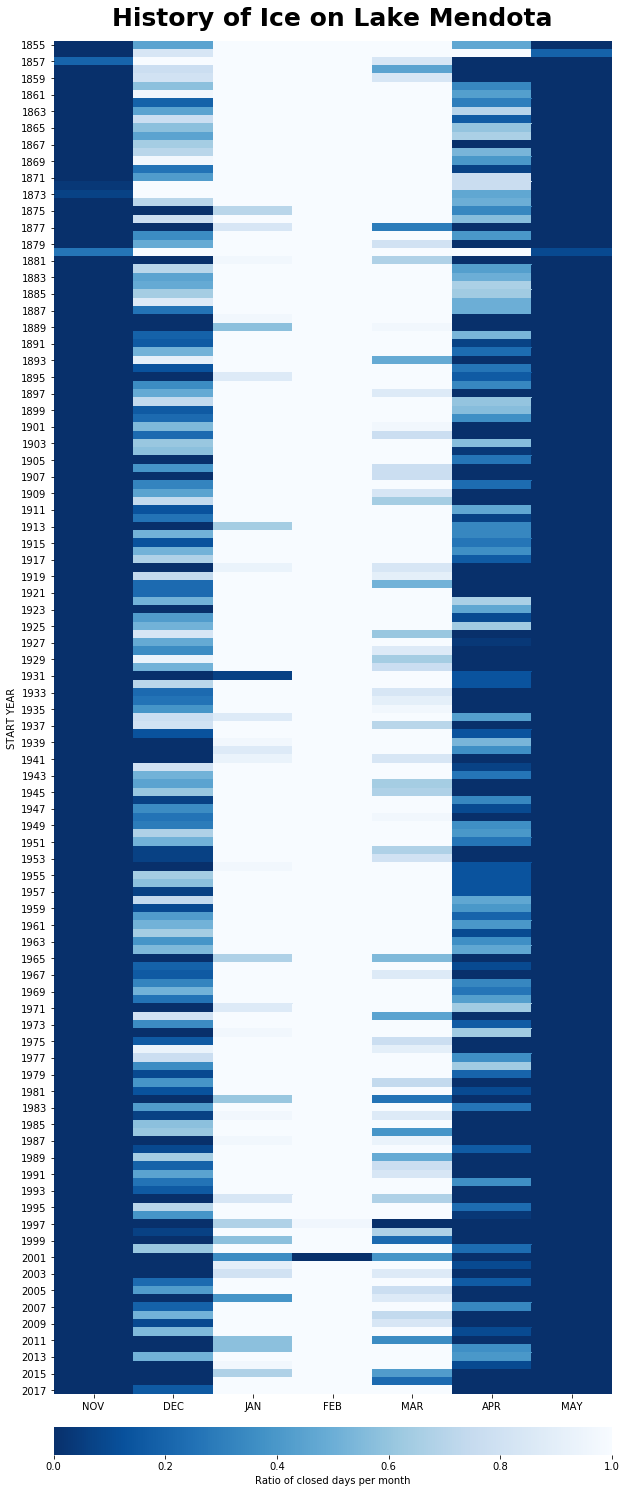

In [12]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,30))
ax.set_title("History of Ice on Lake Mendota", fontsize=25, fontweight='bold', pad=15)
sns.heatmap(
    freeze_df, 
    ax=ax, 
    cmap='Blues_r', 
    cbar_kws=dict(use_gridspec=False,location='bottom',pad=0.02)
)
cbar = ax.collections[0].colorbar
cbar.set_label('Ratio of closed days per month')

plt.show()